In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading file of interest

Spotify = pd.read_csv("spotify_data.csv")
Spotify.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [3]:
# Picking columns of interest from dataset

Spotify = Spotify[['track_name','popularity','danceability','loudness','acousticness','instrumentalness','liveness','tempo','duration_ms']]
Spotify.head(5)

,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms
0,I Won't Give Up,68,0.483,-10.058,0.6940,0.000000,0.1150,133.406,240166
1,93 Million Miles,50,0.572,-10.286,0.4770,0.000014,0.0974,140.182,216387
2,Do Not Let Me Go,57,0.409,-13.711,0.3380,0.000050,0.0895,139.832,158960
3,Fast Car,58,0.392,-9.845,0.8070,0.000000,0.0797,204.961,304293
4,Sky's Still Blue,54,0.430,-5.419,0.0726,0.019300,0.1100,171.864,244320


In [4]:
# Initial shape of dataset

Spotify.shape

(1159764, 9)

In [5]:
#Investigating variables values are stored in the appropriate type or there are errors

Spotify.dtypes

track_name           object
popularity            int64
danceability        float64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
tempo               float64
duration_ms           int64
dtype: object

In [6]:
# Identifying unique values in popularity column

Spotify['popularity'].unique()

array([ 68,  50,  57,  58,  54,  48,  45,  44,  55,  40,  41,  39,  49,
        36,  35,  37,  53,  34,  33,  31,  32,  42,  30,  28,  29,  43,
        27,  24,  26,  38,  25,  22,  23,  21,  18,  19,  20,  17,  16,
        15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,  56,   1,   0,  77,  71,  65,  61,  67,  63,  64,  59,  60,
        51,  70,  52,  47,  62,  46,  66,  69,  85,  79,  80,  78,  76,
        74,  75,  73,  72,  82,  87,  84,  91,  86,  81,  83,  88,  90,
        93,  89,  92,  94,  96, 100,  95], dtype=int64)

In [7]:
# Separating unpopular songs from popular songs
# Unpopular songs will be stored as No_pop

No_pop = Spotify[Spotify['popularity']==0]
No_pop

,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms
1344,Greetings,0,0.696,-5.373,0.0720,0.215000,0.6510,116.633,372933
1348,Do amen do,0,0.706,-10.564,0.1880,0.124000,0.3490,133.461,174840
1349,Shit Music,0,0.776,-6.017,0.2650,0.008770,0.1170,135.024,462807
1350,Mugabe,0,0.797,-4.947,0.3080,0.036200,0.0738,104.992,521512
1353,Kononi,0,0.687,-10.562,0.5400,0.010400,0.0530,90.458,568554
...,...,...,...,...,...,...,...,...,...
1159741,Humankind - Radio Mix,0,0.744,-11.818,0.1010,0.000004,0.3620,90.370,249067
1159746,Mirror Mirror on the Wolf Tell the Story Right...,0,0.725,-6.714,0.0306,0.000642,0.0918,98.983,313280
1159748,C.O.U.M - Instrumental,0,0.771,-10.487,0.5950,0.810000,0.4680,114.032,282373
1159750,Witch Dance feat. Katie Stelmanis,0,0.606,-13.118,0.3880,0.498000,0.1090,104.752,282200


In [8]:
# Shape of data that had unpopular songs

No_pop.shape

(158391, 9)

In [9]:
# Reassigning Dataframe to only popular songs
Spotify = Spotify[Spotify['popularity']!=0]
Spotify.shape

(1001373, 9)

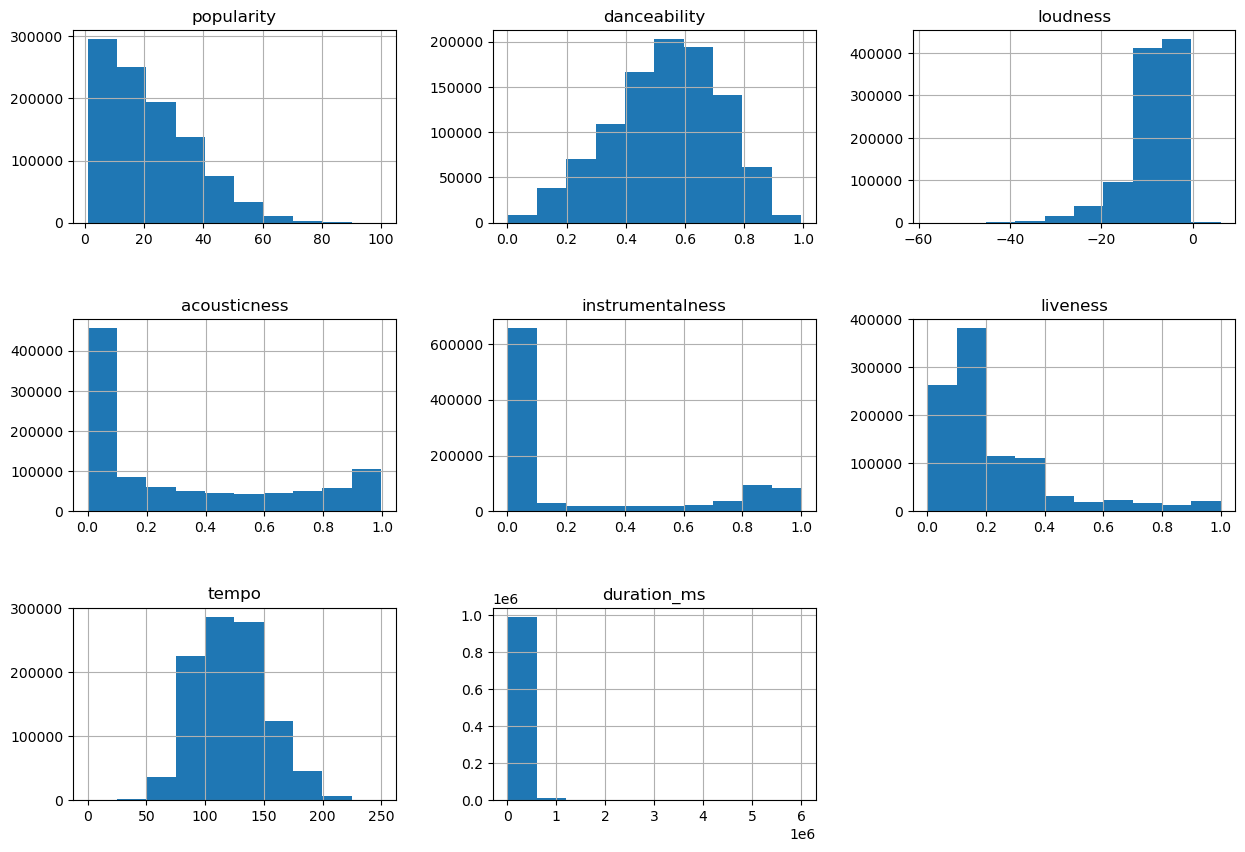

In [10]:
# Reviewing differences in the distribution of features between popular songs and unpopular songs
# Distribution of popular songs 
Spotify.hist(figsize=(15,10))
plt.subplots_adjust(hspace =0.5)

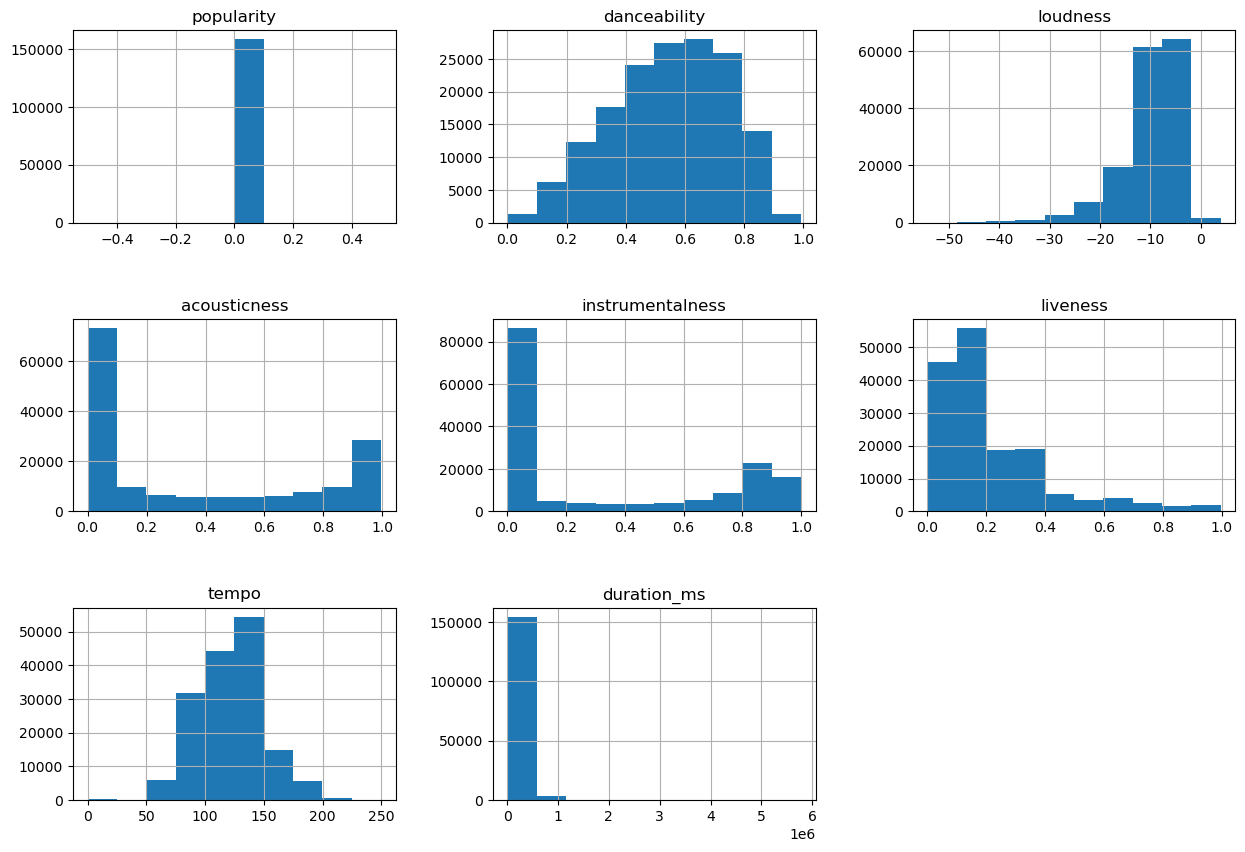

In [11]:
# Distribution of unpopular songs

No_pop.hist(figsize =(15,10))
plt.subplots_adjust(hspace = 0.5)

# From the hsitograms of the features it seems there are differences between features of popular songs and those of unpopular songs.

In [12]:
# Categorizing values in the popularity column


def func(x):
    if 0 <= x <= 10:
        return 'low'
    elif 10 < x <= 30:
        return 'medium'
    elif 30 < x <= 50:
        return 'medium high'
    elif 50 < x <= 70:
        return 'high'
    else:
        return 'highest'

Spotify['col3'] = Spotify['popularity'].apply(func)

In [13]:
Spotify.head()

,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms,col3
0,I Won't Give Up,68,0.483,-10.058,0.6940,0.000000,0.1150,133.406,240166,high
1,93 Million Miles,50,0.572,-10.286,0.4770,0.000014,0.0974,140.182,216387,medium high
2,Do Not Let Me Go,57,0.409,-13.711,0.3380,0.000050,0.0895,139.832,158960,high
3,Fast Car,58,0.392,-9.845,0.8070,0.000000,0.0797,204.961,304293,high
4,Sky's Still Blue,54,0.430,-5.419,0.0726,0.019300,0.1100,171.864,244320,high


In [14]:
# Assigning new column name 

Spotify = Spotify.rename(columns = {'col3':'popularity_range'})

Spotify.head()

,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity_range
0,I Won't Give Up,68,0.483,-10.058,0.6940,0.000000,0.1150,133.406,240166,high
1,93 Million Miles,50,0.572,-10.286,0.4770,0.000014,0.0974,140.182,216387,medium high
2,Do Not Let Me Go,57,0.409,-13.711,0.3380,0.000050,0.0895,139.832,158960,high
3,Fast Car,58,0.392,-9.845,0.8070,0.000000,0.0797,204.961,304293,high
4,Sky's Still Blue,54,0.430,-5.419,0.0726,0.019300,0.1100,171.864,244320,high


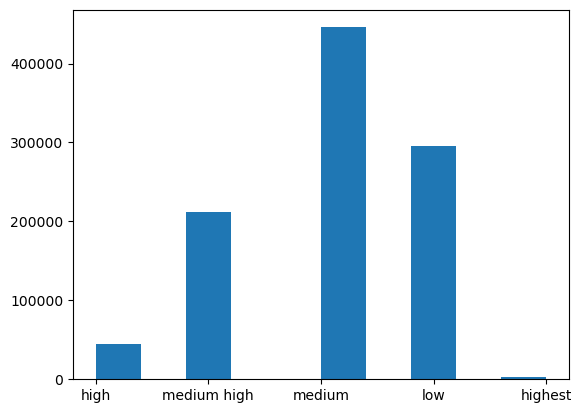

In [15]:
# Visualizing popularity_range column

plt.hist(x= Spotify['popularity_range'], bins=10)
plt.show()

# Most of  popular songs were within the medium popularity range(11-30). A few were within the highest popularity range(71-100)

In [16]:
# Checking rows of the most popular songs

Spotify[Spotify['popularity_range']== 'highest']

,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity_range
1770,Everybody Talks,77,0.471,-3.906,0.00301,0.000,0.3130,154.961,177280,highest
1771,Rosemary,71,0.285,-6.412,0.01850,0.100,0.1140,126.628,413347,highest
1773,Courtesy Call,71,0.531,-5.145,0.00409,0.000,0.0822,164.079,236898,highest
12104,Locked out of Heaven,85,0.726,-4.165,0.04900,0.000,0.3090,143.994,233478,highest
12105,Classic,79,0.720,-4.689,0.03840,0.000,0.1570,102.071,175427,highest
...,...,...,...,...,...,...,...,...,...,...
1147451,The A Team,73,0.642,-9.918,0.66900,0.000,0.1800,84.996,258373,highest
1147460,Lego House,72,0.592,-8.480,0.56200,0.000,0.1300,159.701,185093,highest
1147461,Fuiste Tú (feat. Gaby Moreno),74,0.591,-3.515,0.62200,0.000,0.1120,139.939,265307,highest
1147471,Ya Te Olvidé,72,0.445,-3.500,0.31800,0.000,0.1990,191.964,211373,highest


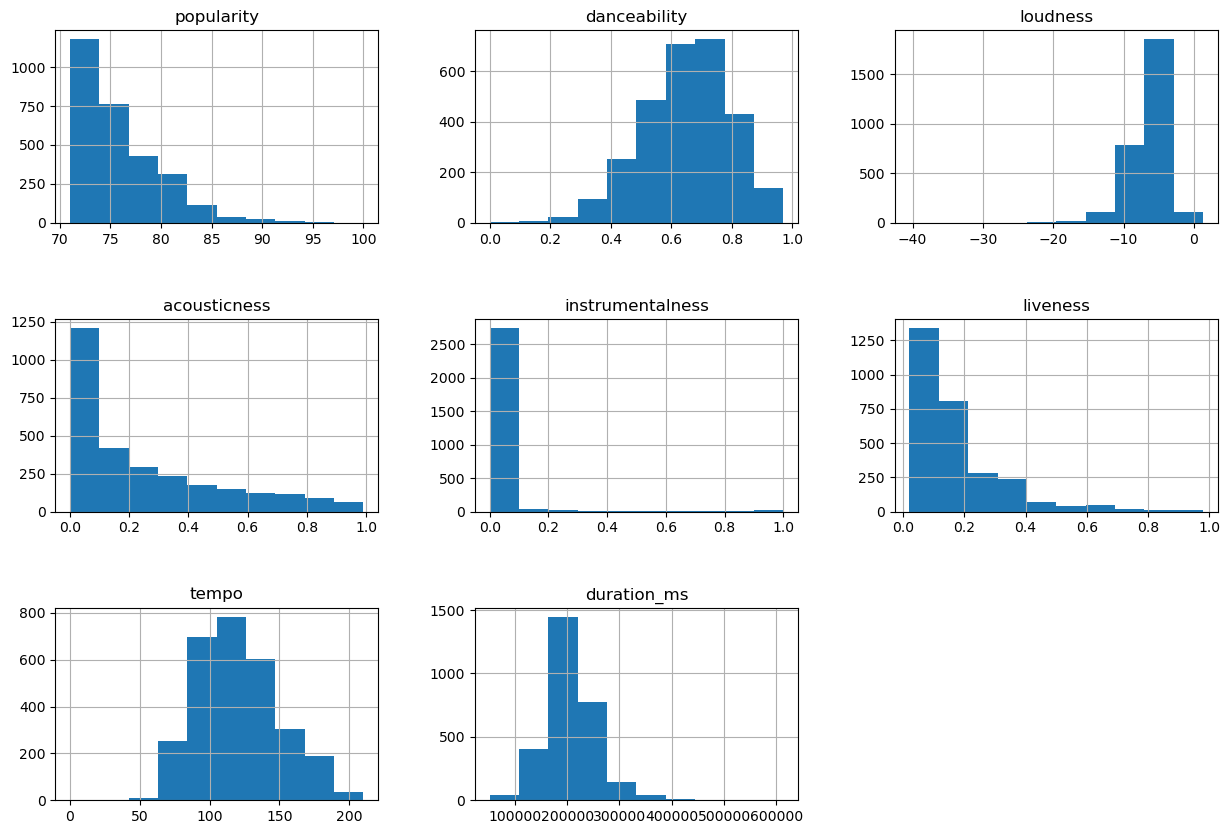

In [17]:
# Distribution of popular songs with higest popularity

med_high = Spotify[Spotify['popularity_range']== 'highest']

med_high.hist(figsize=(15,10))
plt.subplots_adjust(hspace =0.5)



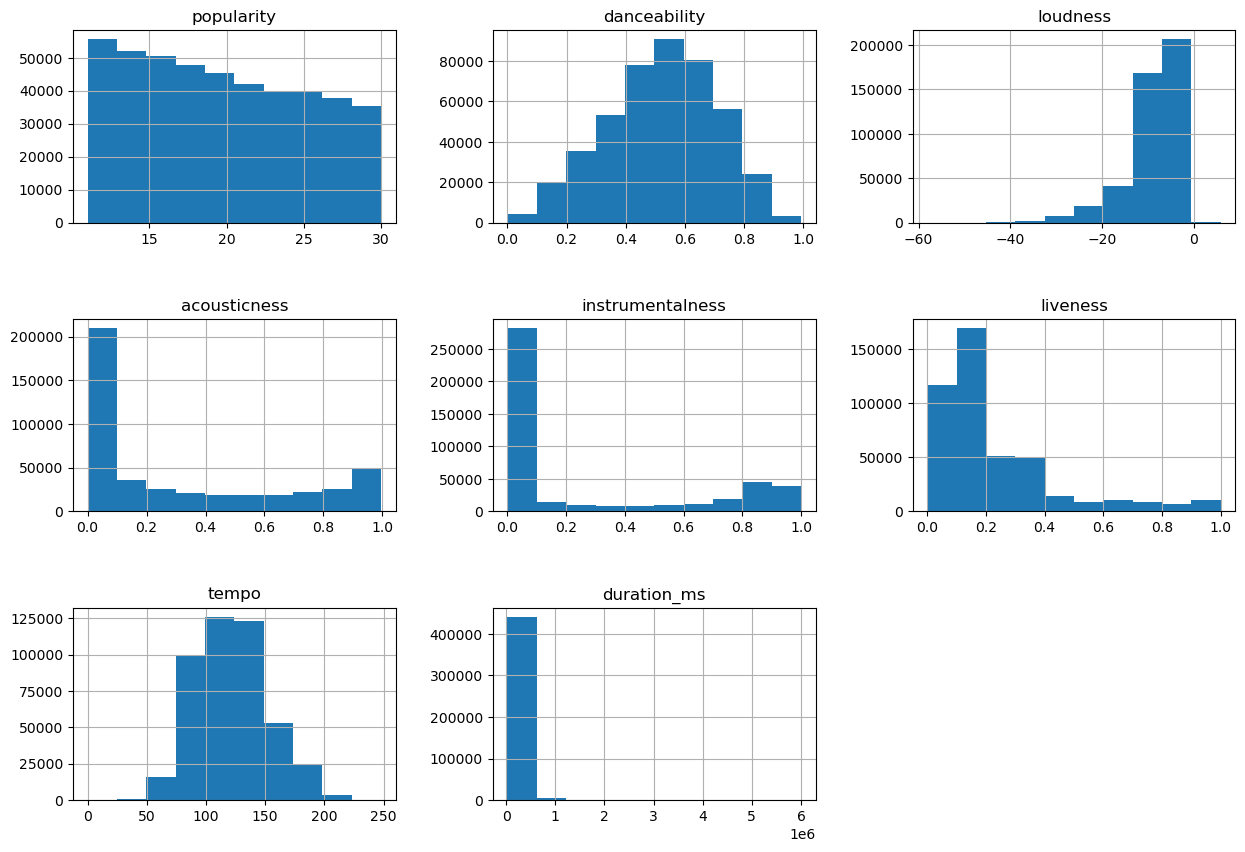

In [18]:
# Distribution of majority of data in Spotify had a medium range

med_pop = Spotify[Spotify['popularity_range']== 'medium']
med_pop.hist(figsize=(15,10))
plt.subplots_adjust(hspace =0.5)

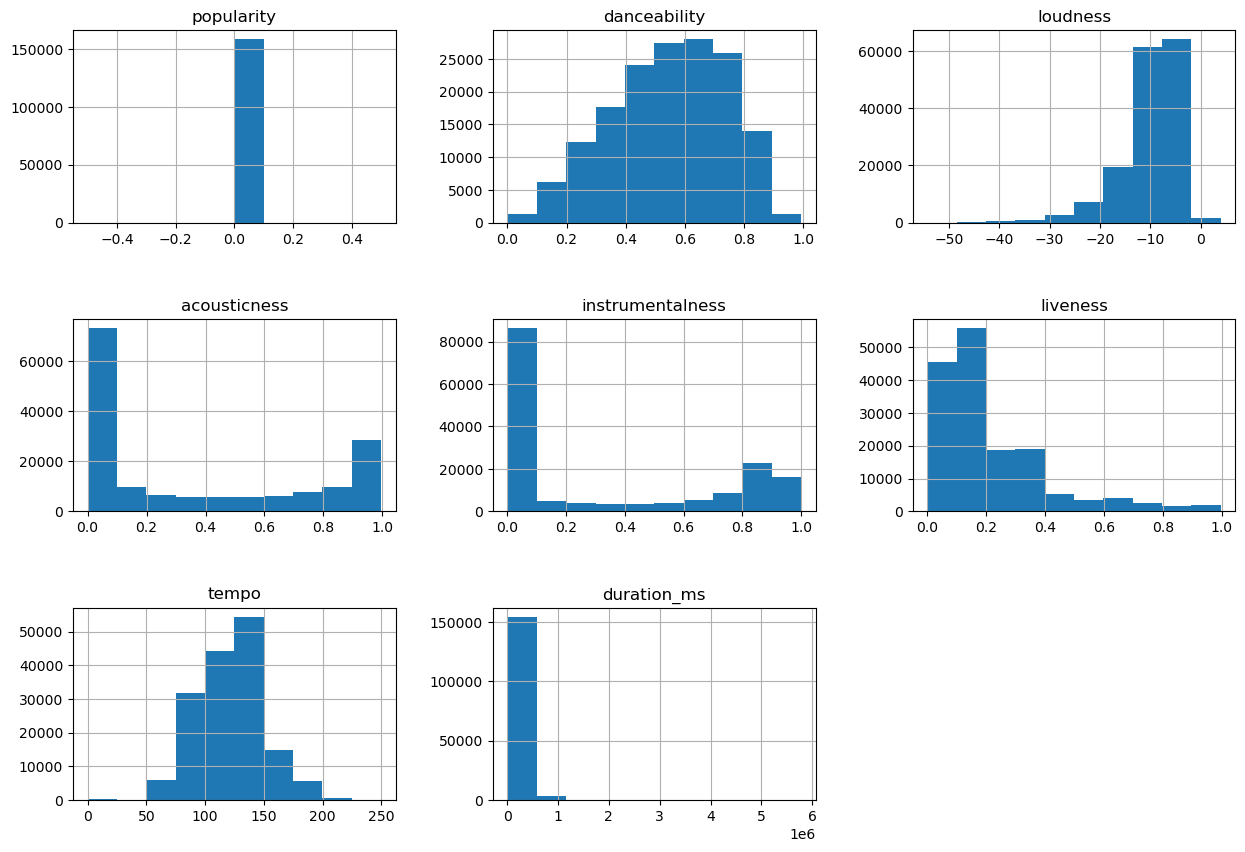

In [19]:
# Distribution of unpopular songs

No_pop.hist(figsize=(15,10))
plt.subplots_adjust(hspace =0.5)